In [1]:
import pandas as pd
import matplotlib.pyplot as plt

program=['Football','Wrestling','Track','Lacrosse','Karate','Skiing']
counts_2019=[125,25,42,26,35,0]
counts_2020=[55,0,32,15,0,100]
sports=pd.DataFrame(index=program,columns=['2019','2020'],data=zip(counts_2019,counts_2020))


### Method to annotate bar charts

This method is used to annotate stacked vertical and horizontal bar charts


In [5]:
def annotate_plot(rects, ax,offset_text=True, horizontal=True):
    for p in rects:
        """
        offset_text: 
            True positions text at the end of the bar for the centered stacked bar chart
            False centers text

        horizontal:
            True indicates a horizontal bar chart; False is vertical

        """

        width=p.get_width() 
        height=p.get_height() 
        x=p.get_xy()[0] #gets the x coordinate of the bar
        y=p.get_xy()[1] #gets the y coordinate of the bar

        #if the text should be offset and not centered
        #variable sets the offset so it's negative if the width value is negative
        offset=0 if not offset_text else 10 if width >0 else -10 
        
        #sets the x-location to be centered if not offset
        x_loc=x+width/2 if not offset_text else x+width

        #converts width and height to string values
        horizontal_text='' if width ==0 else str(abs(int(width)))
        vertical_text ='' if height == 0 else str(abs(int(height)))
        
        text = horizontal_text if horizontal else vertical_text        
        
        ax.annotate(text,xy=(x_loc,y+height/2), 
                     xytext=(offset,0),
                    textcoords='offset points',
                    ha='center',va='center')


### Stacked Horizontal Bar Chart

The code below produces a stacked horizontal bar chart with centered annotations

Text(0.5, 1.0, 'Participation By Year')

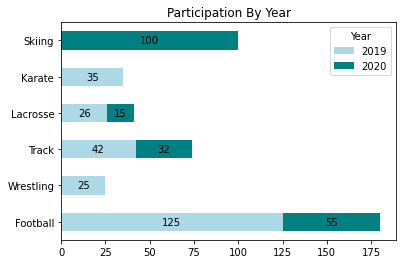

In [6]:
fig,ax=plt.subplots()
sports.plot.barh(stacked=True, ax=ax, color=['lightblue','teal'])
ax.legend(title='Year')
annotate_plot(ax.patches,ax,False)
ax.set_title('Participation By Year')


#### Example of Completed Annotated Horizontal Stacked Bar Chart

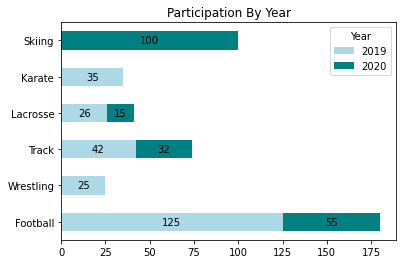

### Centered Stacked Horizontal Bar Chart

The code below produces a stacked bar chart that's centered around 0

Text(0.5, 1.0, 'Participation By Year')

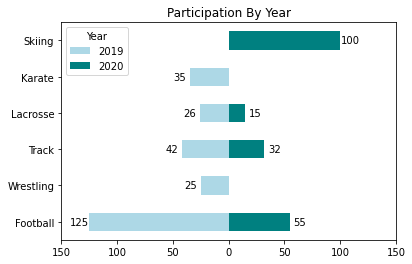

In [7]:
sports_new=sports.copy()

fig1,ax1=plt.subplots()

#reverse the numbers for values to appear on the left of the chart
sports_new['rev_2019']=sports_new['2019']*-1 
sports_new[['rev_2019','2020']].plot.barh(stacked=True, 
                     color=['lightblue','teal'],
                     ax=ax1)

#uses absolute values of the tick labels to place positive values
#on both sides of the x axis
labels=[str(int(abs(labels))) for labels in ax1.get_xticks()]

#must call set_xticks() when calling set_xticklabels()
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(labels)

#custom function to annotate plot
annotate_plot(ax1.patches,ax1)

ax1.legend(title='Year',labels=['2019','2020'])
ax1.set_title('Participation By Year')


#### Example of Annotated Centered Horizontal Stacked Bar Chart

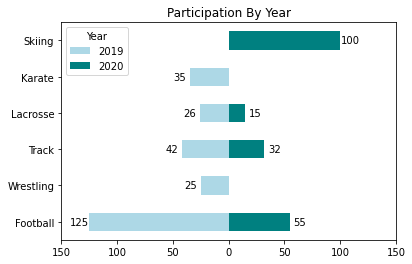